In [1]:
import warnings
warnings.filterwarnings('ignore')

from math import sqrt
from scipy import stats
from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import train_test_split
import sklearn.metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## importing function files
from acquire import get_fraud_data, summarize_df
from prepare import prep_dates_cc_fraud, create_features, make_bins_and_feats, split_data
from explore import variable_distributions, observe_cross, observe_chi
from modeling import evaluate


## Credit Card Fraud Detection Project: Classification

### Executive Summary

The purpose of this notebook is to acquire, prep, explore a csv file downloaded from kaggle.com that contains Credit Card transactions and use classification modeling to predict whether or not the transactions made were fraud
 - target variable column: is_fraud
 
After visual exploration and statistical testing the features that were inputted into our models were 
 - high_dollars (transactions that were deemed expensive) 
 - late_night (transactions that occured in the hours of 11PM and 12AM) 
 - amt (the amount of the transaction) 
 - high_fraud_cat (transactions that fell under the online shopping or grocery shopping category)
 
Our most successful model that was used on our Out-of-sample (test) dataframe was the Random Forest Model II which performed with the folling metrics:
 - Accuracy: 90.7182%
 - True Positive Rate: 90.740%
 - True Negative Rate: 90.718%
 - False Positive Rate: 9.282%
 - False Negative Rate: 9.260%
 
Overall the modeling and project was a success and you can follow the steps below to reproduce it!

### Acquire

In [2]:
df = get_fraud_data() ## <-- acquire csv file function into pandas dataframe

Shape of Dataframe (rows, columns):

(1296675, 22)


In [3]:
df.head(3) ## <-- looking at a sample of our dataframe

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0


In [4]:
summarize_df(df)  ## summarize df function

Numerical Transposed Statistics:

                count          mean           std           min           25%  \
cc_num      1296675.0  4.171920e+17  1.308806e+18  6.041621e+10  1.800429e+14   
amt         1296675.0  7.035104e+01  1.603160e+02  1.000000e+00  9.650000e+00   
zip         1296675.0  4.880067e+04  2.689322e+04  1.257000e+03  2.623700e+04   
lat         1296675.0  3.853762e+01  5.075808e+00  2.002710e+01  3.462050e+01   
long        1296675.0 -9.022634e+01  1.375908e+01 -1.656723e+02 -9.679800e+01   
city_pop    1296675.0  8.882444e+04  3.019564e+05  2.300000e+01  7.430000e+02   
unix_time   1296675.0  1.349244e+09  1.284128e+07  1.325376e+09  1.338751e+09   
merch_lat   1296675.0  3.853734e+01  5.109788e+00  1.902779e+01  3.473357e+01   
merch_long  1296675.0 -9.022646e+01  1.377109e+01 -1.666712e+02 -9.689728e+01   
is_fraud    1296675.0  5.788652e-03  7.586269e-02  0.000000e+00  0.000000e+00   

                     50%           75%           max  
cc_num      3.52141

#### Acquire Takeaways:
 - We have succesfully acquire the data from our csv into a pandas dataframe and named it df
 - There are 0 null values in our rows and columns meaning we won't have to drop any nulls or impute 
 - There is plenty of data to work with: there is more than 1 millions rows of information
 - Looking at our target variable value counts: there is some class imbalance that will need to be addressed down the road to help out with the modeling

### Prepare

#### Creating Datetime Object and Columns

#### Using Datetime 
 - Deriving More Features
     - Hour
     - Weekday
     - Month
     - Year
     

In [5]:
df = prep_dates_cc_fraud(df) ## function to make datetime object and respective features

Looking at our weekday Values
0          1
1          1
2          1
3          1
4          1
          ..
1296670    6
1296671    6
1296672    6
1296673    6
1296674    6
Name: weekday, Length: 1296675, dtype: int64
----------------------------

Looking at our transaction hour Values
0           0
1           0
2           0
3           0
4           0
           ..
1296670    12
1296671    12
1296672    12
1296673    12
1296674    12
Name: trans_hour, Length: 1296675, dtype: int64
----------------------------

Looking at our year Values
0          2019
1          2019
2          2019
3          2019
4          2019
           ... 
1296670    2020
1296671    2020
1296672    2020
1296673    2020
1296674    2020
Name: year, Length: 1296675, dtype: int64
----------------------------

Looking at our month Values
0          1
1          1
2          1
3          1
4          1
          ..
1296670    6
1296671    6
1296672    6
1296673    6
1296674    6
Name: month, Length: 1296675, dtype

In [6]:
df.head(3) ## <--- Looking at new dataframe with Datetime Object and Categorical Columns

,trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,unix_time,merch_lat,merch_long,is_fraud,weekday,trans_hour,year,month,customer_age,late_night
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,1325376018,36.011293,-82.048315,0,1,0,2019,1,31,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,1325376044,49.159047,-118.186462,0,1,0,2019,1,41,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,1325376051,43.150704,-112.154481,0,1,0,2019,1,57,0


#### Feature Engineering

In [7]:
## function to make more categorical features from original df columns
df = create_features(df) 

In [8]:
df.head(3) ## <--- Looking at new dataframe with Engineered Categorical Columns

,trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,high_fraud_cat,is_male,is_female,Nevada,California,New_Mexico,Florida,Texas,Virginia,Arizona
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,0,0,1,0,0,0,0,0,0,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,1,0,1,0,0,0,0,0,0,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,0,1,0,0,0,0,0,0,0,0


#### Making Bins and Their Respective Features

Looking at our maximum age and minimum age to make some age bins
96 14
----------------------------

Looking at our Age Bins
2    502486
3    488483
4    262691
1     43015
Name: age_bin, dtype: int64
----------------------------

Looking at our maximum amount and minimum amount to make some transaction amount bins
28948.9 1.0
----------------------------

Visualizing amounts to help my decision with binning


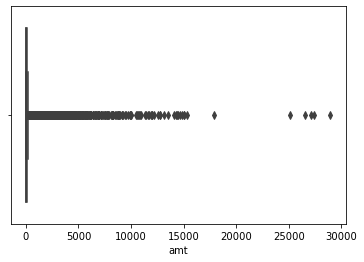

----------------------------

Looking at our Amount Bins
1    463556
4    389483
5    172969
2    118829
3     89914
6     61924
Name: amt_bin, dtype: int64
----------------------------



In [9]:
df = make_bins_and_feats(df) ## function to make bins and their respective 

In [10]:
df.head(3) ## <-- Looking at new dataframe with bins and their Categorical Columns

,trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,0-25_dollars,25-40_dollars,40-50_dollars,50-100_dollars,100-200_dollars,high_dollars,0-20_age,20-40_age,40-60_age,60-96_age
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,1,0,0,0,0,0,0,1,0,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,0,0,0,0,1,0,0,0,1,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,0,0,0,0,0,1,0,0,1,0


#### Performing Train Test Split

In [11]:
train, validate, test = split_data(df)

Making Sure Our Shapes Look Good
Train: (726138, 57), Validate: (311202, 57), Test: (259335, 57)
----------------------------

Making Sure We Have Positive Cases In Each Split

Train Target Value Counts:
0    721934
1      4204
Name: is_fraud, dtype: int64
----------------------------

Validate Target Value Counts:
0    309401
1      1801
Name: is_fraud, dtype: int64
----------------------------

Test Target Value Counts:
0    257834
1      1501
Name: is_fraud, dtype: int64
----------------------------



#### Peeking at Train Split

In [12]:
train.head(3)

,trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,0-25_dollars,25-40_dollars,40-50_dollars,50-100_dollars,100-200_dollars,high_dollars,0-20_age,20-40_age,40-60_age,60-96_age
76830,2019-02-15 02:48:54,180011453250192,fraud_Volkman-Predovic,shopping_net,97.35,Craig,Dunn,M,721 Jacqueline Brooks,New Boston,...,0,0,0,1,0,0,0,1,0,0
140225,2019-03-17 15:01:34,676308307625,fraud_Thiel PLC,misc_pos,160.97,Donald,Evans,M,1287 Michael Roads,Washoe Valley,...,0,0,0,0,1,0,0,1,0,0
539623,2019-08-19 10:08:47,3597337756918966,fraud_Heidenreich PLC,grocery_pos,73.17,Linda,Gonzalez,F,17667 Price Spur Apt. 366,Glen Rock,...,0,0,0,1,0,0,0,0,0,1


In [13]:
train.columns

Index(['trans_time', 'cc_num', 'merchant', 'category', 'amt', 'first', 'last',
       'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop',
       'job', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long',
       'is_fraud', 'weekday', 'trans_hour', 'year', 'month', 'customer_age',
       'late_night', 'entertainment', 'home', 'shopping_net', 'misc_net',
       'grocery_net', 'grocery_pos', 'travel', 'high_fraud_cat', 'is_male',
       'is_female', 'Nevada', 'California', 'New_Mexico', 'Florida', 'Texas',
       'Virginia', 'Arizona', 'age_bin', 'amt_bin', '0-25_dollars',
       '25-40_dollars', '40-50_dollars', '50-100_dollars', '100-200_dollars',
       'high_dollars', '0-20_age', '20-40_age', '40-60_age', '60-96_age'],
      dtype='object')

#### Prepare Takeaways:
 - I took my original 22 column dataframe and duplicated the potential modeling features by adding 35 additional columns using mostly np.where statements on the state and category columns splitting them into likely fradulent categorical columns (States prone to fraud & categories of most fradulent transactions 
 - I also split the gender column into a is_male and is_female column
 - Also using datetime (converting the transaction_time column) I was able to create columns for transaction: hour, weekday, month, and year
 - With the tran_time being date time I was also able to convert the customer dob (date of birth column) into datetime and use a Time delta to obtain the customer age as a column

##### Other Features
 - I was also able to make bins for the amt (amount of transaction column) and customer_age column and turn those into respective categorical features as well.

##### Overall

The new prepared dataframe has 0 nulls, plenty of features to work with, and an even amount of positive cases after performing the train, validate, and test split

### Explore

#### Variable Distributions

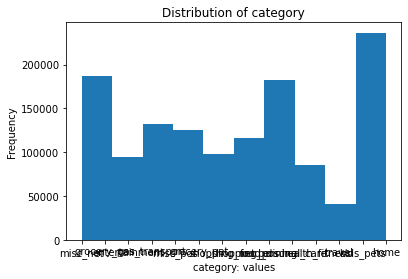

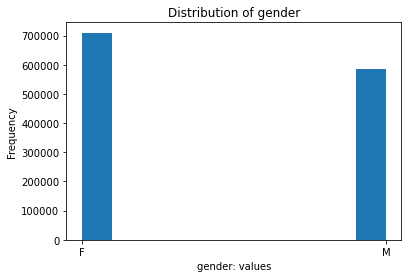

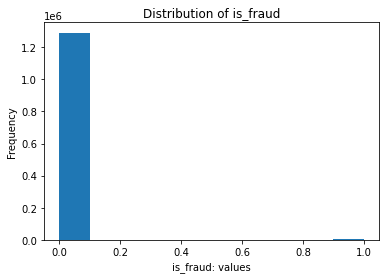

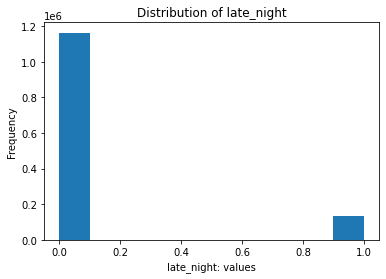

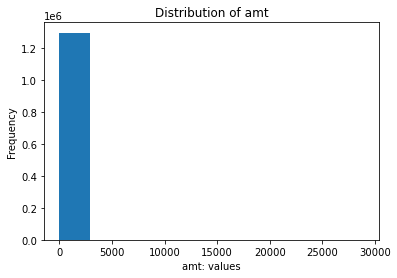

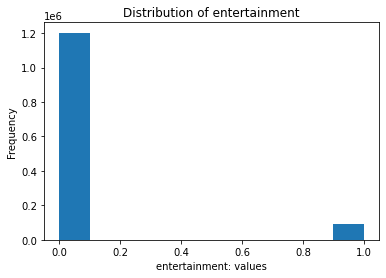

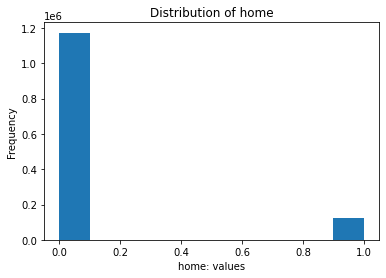

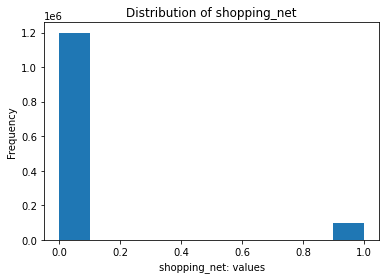

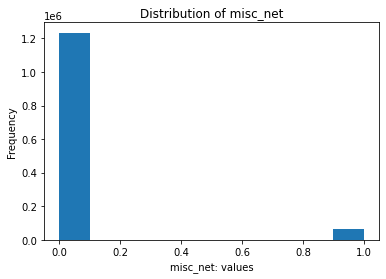

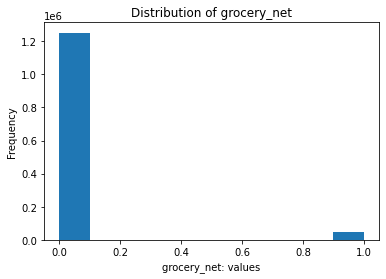

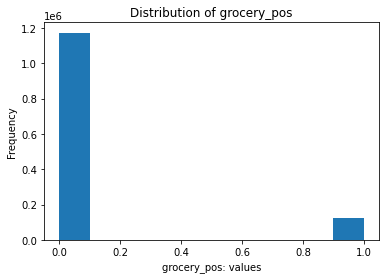

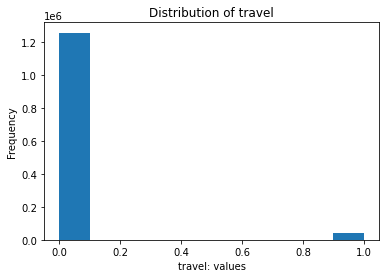

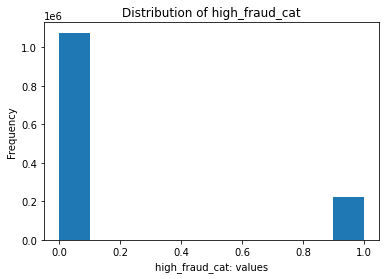

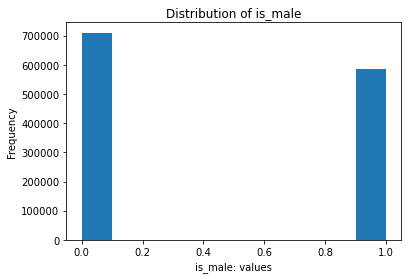

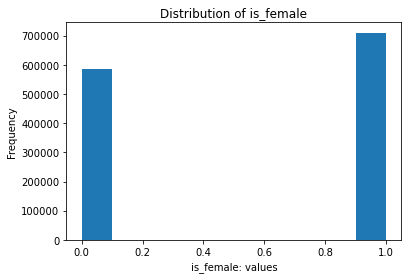

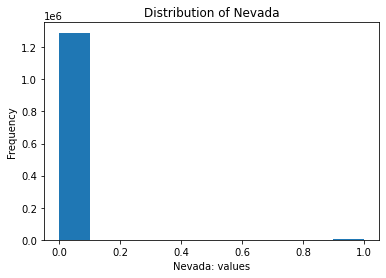

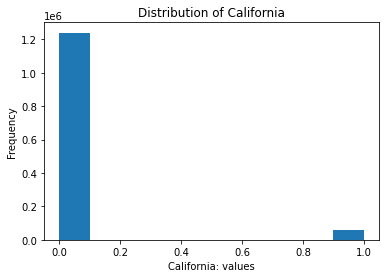

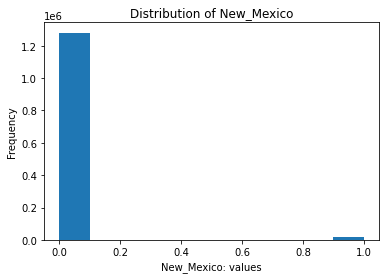

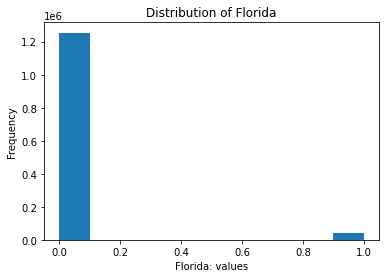

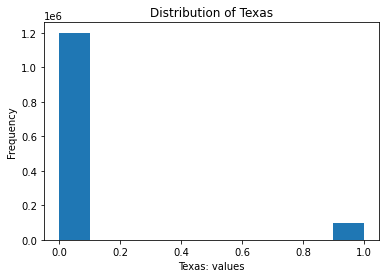

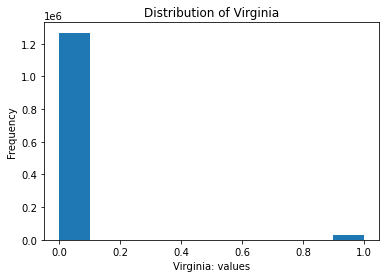

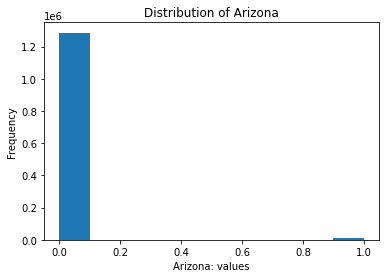

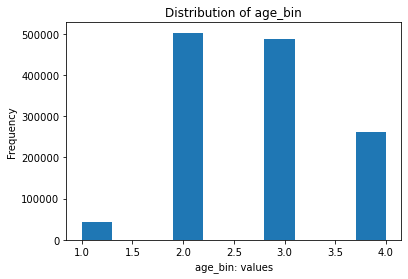

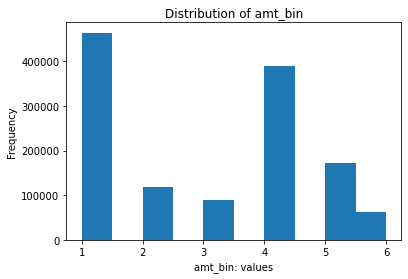

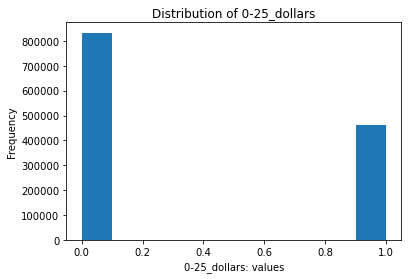

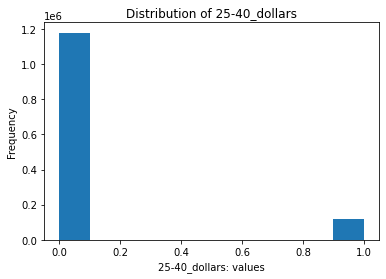

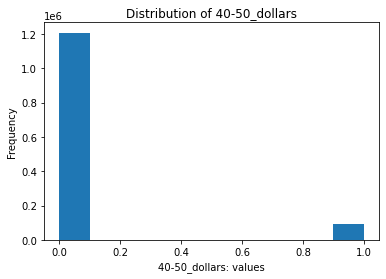

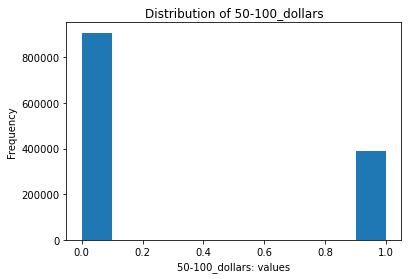

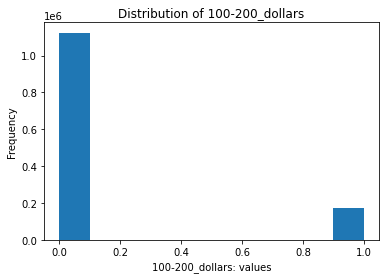

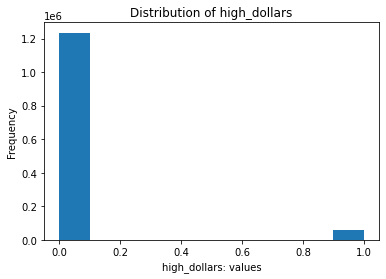

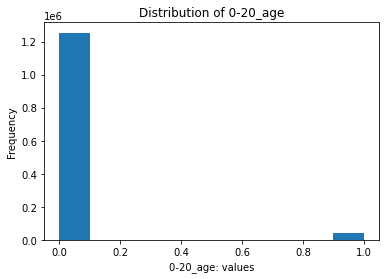

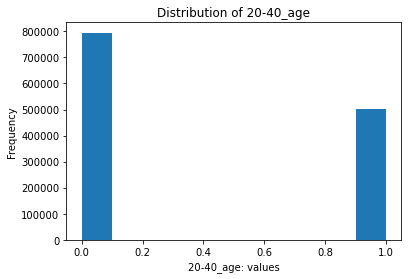

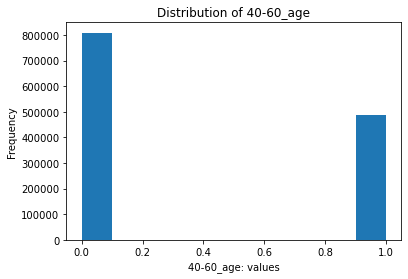

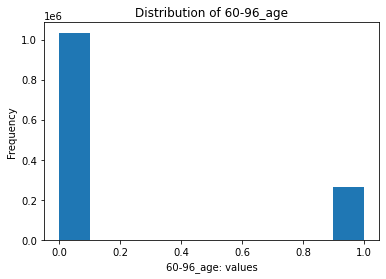

In [14]:
variable_distributions(df)

#### Bar Graphs

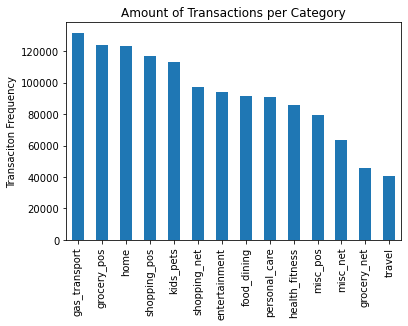

In [15]:
df['category'].value_counts().plot.bar()
plt.ylabel('Transaciton Frequency')
plt.title('Amount of Transactions per Category')
plt.show()

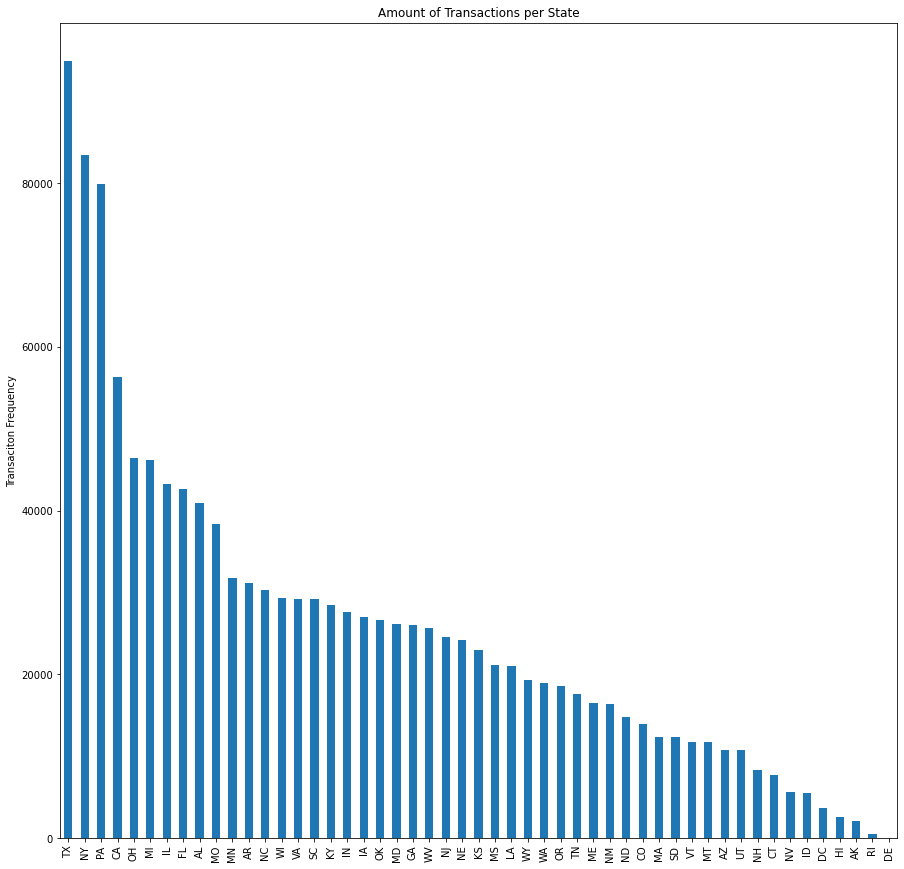

In [16]:
plt.figure(figsize = (15,15))
df['state'].value_counts().plot.bar()
plt.ylabel('Transaciton Frequency')
plt.title('Amount of Transactions per State')
plt.show()

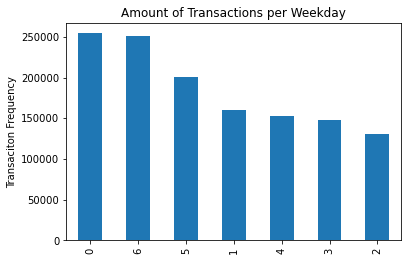

In [17]:
df['weekday'].value_counts().plot.bar()
plt.ylabel('Transaciton Frequency')
plt.title('Amount of Transactions per Weekday')
plt.show()

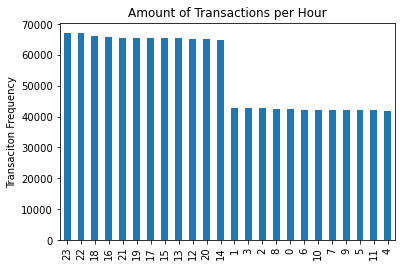

In [18]:
df['trans_hour'].value_counts().plot.bar()
plt.ylabel('Transaciton Frequency')
plt.title('Amount of Transactions per Hour')
plt.show()

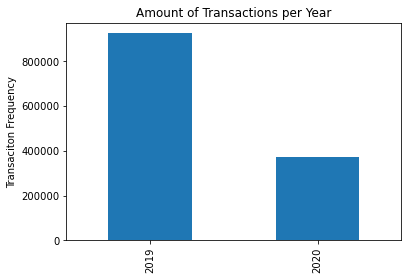

In [19]:
df['year'].value_counts().plot.bar()
plt.ylabel('Transaciton Frequency')
plt.title('Amount of Transactions per Year')
plt.show()

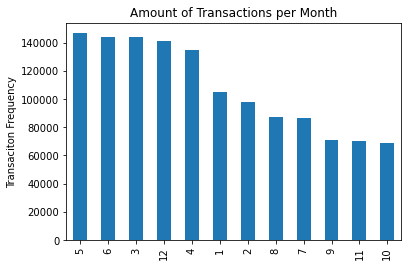

In [20]:
df['month'].value_counts().plot.bar()
plt.ylabel('Transaciton Frequency')
plt.title('Amount of Transactions per Month')
plt.show()

#### Heatmap with target variable

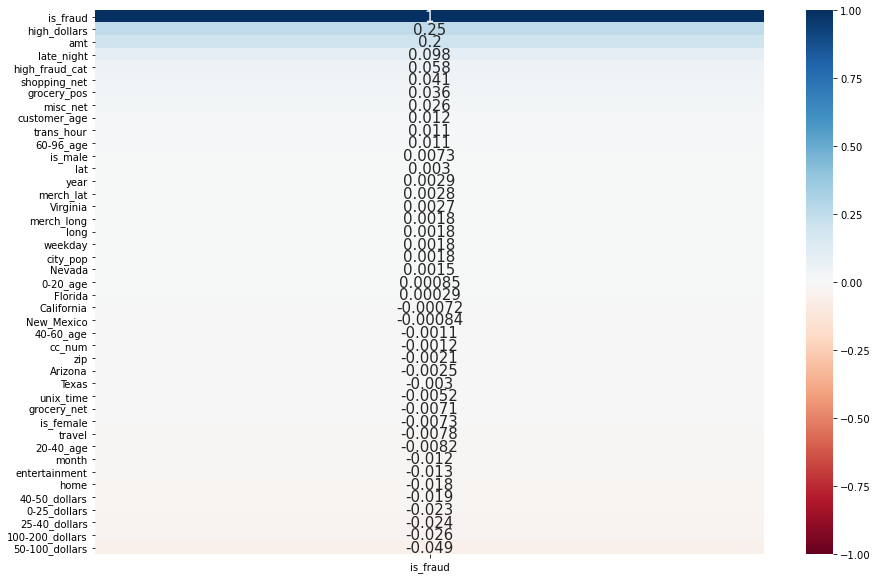

In [21]:
## making a heap map to look at correlations with is_fraud for the train data set
## helping me choose which features to use in my model

plt.figure(figsize = (15,10))  
sns.heatmap(train.corr()[['is_fraud']].sort_values(by='is_fraud', ascending = False), 
            cmap = 'RdBu', vmax = 1, vmin = -1, center = 0, annot = True, annot_kws={"size": 15} )
plt.show()                    

#### Crosstabs Looking for Fraud

In [22]:
observe_cross(df.weekday, df.is_fraud)

is_fraud,0,1
weekday,,
5,199730,1227
6,249363,1216
0,253100,1182
4,151193,1079
3,146277,1008


Friday and Saturdays have the highest amounts of Fraud

In [23]:
observe_cross(df.month, df.is_fraud)

is_fraud,0,1
month,,
3,142851,938
5,145940,935
2,96804,853
1,103878,849
6,143123,688


March and May have the highest amount of Fraud

In [24]:
observe_cross(df.trans_hour, df.is_fraud)

is_fraud,0,1
trans_hour,,
22,65051,1931
23,65200,1904
1,42211,658
0,41867,635
2,42031,625


12 AM and 11 PM transactions have a very high amount of fraud transactions compared to the others times of day

In [25]:
observe_cross(df.category, df.is_fraud)

is_fraud,0,1
category,,
grocery_pos,121895,1743
shopping_net,95830,1713
misc_net,62372,915
shopping_pos,115829,843
gas_transport,131041,618


grocery_pos and shopping_net have high amounts of fraud transactions compared to other categories

In [26]:
observe_cross(df.state, df.is_fraud)

is_fraud,0,1
state,,
NY,82946,555
TX,94397,479
PA,79389,458
CA,56034,326
OH,46159,321


New York and Texas have the highest amount of fraud transactions compared to other states

In [27]:
observe_cross(df.city, df.is_fraud)

is_fraud,0,1
city,,
Houston,4129,39
Warren,4566,33
Naples,4126,29
Huntsville,3531,29
Topeka,3001,27


Houston and Warren have the highest amount of fraud transactions out of all the cities

In [28]:
observe_cross(df.job, df.is_fraud)

is_fraud,0,1
job,,
Materials engineer,8208,62
Trading standards officer,4585,56
Naval architect,8631,53
Exhibition designer,9148,51
"Surveyor, land/geomatics",8630,50


Materials engineer and Trading standards officers are victims of fraud the most frequently

In [29]:
observe_cross(df.merchant, df.is_fraud)

is_fraud,0,1
merchant,,
fraud_Rau and Sons,2441,49
fraud_Kozey-Boehm,1818,48
fraud_Cormier LLC,3601,48
fraud_Vandervort-Funk,2427,47
fraud_Doyle Ltd,2511,47


There isn't much variance in the merchant column and the amount of fraud transactions, however, Rau and Sons and Kozey_Boehm have the most fraud transactions

#### Visual Explore Takeaways:
 - Looking at the bar charts we can see that most of the transaction occur during the evening hours of the day
     - Most likely due to those being high traffic times for purchases due to most of the working population beeing off work at those times
 - Most of the fradulent transaction occur late in the evening around the hours of 11PM and 12 AM
 - Most of the fradulent transactions fall under the shopping_net (online shopping) category and grocery_pos category (grocery in store shopping)
 - Finally the heatmap shows that the columns that correlate with our target is_fraud the most are high_dollars, late_night, amt, and high_fraud_cat. Some statistical testing will need to be done to see if these relationships are significant

### Explore: Statistical Testing

#### Chi Square Testing

In [30]:
## Universally our alpha value for all testing 

alpha = 0.05

##### Online Shopping vs Fraud

Question: Is there a significant relationship between the two categorical variables: online shopping (shopping_net column) and the target variable is_fraud

 - $H_0$: There is no relationship between a cc transaction being used for online shopping and whether the transaction was fraud

 - $H_a$: There is a significant relationship between a cc transaction being used for online shopping and whether the transaction was fraud

In [31]:
observe_chi(df.shopping_net, df.is_fraud) 

Comparing our Variables

is_fraud            0     1
shopping_net               
0             1193339  5793
1               95830  1713
----------------------

Observed

[[1193339    5793]
 [  95830    1713]]
---
Expected

[[1.19219064e+06 6.94135754e+03]
 [9.69783575e+04 5.64642457e+02]]
---

chi^2 = 2537.9782
p     = 0.0000


Since the p-value returned is less than our alpha and near 0 we can determine there is a significnat relationship between a cc transaction being used for online shopping and whether the transaction was fraud.

##### Expensive Transactions vs Fraud

Question: Is there a significant relationship between the two categorical variables: expensive transactions (high_dollars column) and the target variable is_fraud

 - $H_0$: There is no relationship between a cc transaction being expensive and whether the transaction was fraud

 - $H_a$: There is a significant relationship between a cc transaction being expensive and whether the transaction was fraud

In [32]:
observe_chi(df.high_dollars, df.is_fraud) 

Comparing our Variables

is_fraud            0     1
high_dollars               
0             1232949  1802
1               56220  5704
----------------------

Observed

[[1232949    1802]
 [  56220    5704]]
---
Expected

[[1.22760346e+06 7.14754353e+03]
 [6.15655435e+04 3.58456471e+02]]
---

chi^2 = 84185.8505
p     = 0.0000


Since the p-value returned is less than our alpha and near 0 we can determine there is a significnat relationship a cc transaction being expensive and whether the transaction was fraud.

##### Late at Night vs Fraud

Question: Is there a significant relationship between the two categorical variables: if the transaction was late at night (late_night column 10PM or 11PM) and the target variable is_fraud

 - $H_0$: There is no relationship between a cc transaction being late at night and whether the transaction was fraud

 - $H_a$: There is a significant relationship between a cc transaction being late at night and whether the transaction was fraud

In [33]:
observe_chi(df.late_night, df.is_fraud) 

Comparing our Variables

is_fraud          0     1
late_night               
0           1158918  3671
1            130251  3835
----------------------

Observed

[[1158918    3671]
 [ 130251    3835]]
---
Expected

[[1.15585918e+06 6.72982284e+03]
 [1.33309823e+05 7.76177158e+02]]
---

chi^2 = 13518.6091
p     = 0.0000


Since the p-value returned is less than our alpha and near 0 we can determine there is a significnat relationship a cc transaction being late at night and whether the transaction was fraud.

##### High Fraud Transaction Category vs Fraud

Question: Is there a significant relationship between the two categorical variables: if the transaction was in the high fraud category (high_fraud_cat column online shopping and grocery point of sale transactions) and the target variable is_fraud

 - $H_0$: There is no relationship between a cc transaction being in the high fraud category and whether the transaction was fraud

 - $H_a$: There is a significant relationship between a cc transaction being in the high fraud category and whether the transaction was fraud

In [34]:
observe_chi(df.high_fraud_cat, df.is_fraud) 

Comparing our Variables

is_fraud              0     1
high_fraud_cat               
0               1071444  4050
1                217725  3456
----------------------

Observed

[[1071444    4050]
 [ 217725    3456]]
---
Expected

[[1069268.33978136    6225.66021864]
 [ 219900.66021864    1280.33978136]]
---

chi^2 = 4481.2760
p     = 0.0000


Since the p-value returned is less than our alpha and near 0 we can determine there is a significnat relationship a cc transaction being in the high fraud category and whether the transaction was fraud.

##### 50 - 100 Dollar Transactions vs Fraud

Question: Is there a significant relationship between the two categorical variables: if the transaction was between the 50 to 100 dollar range and the target variable is_fraud

 - $H_0$: There is no relationship between a cc transaction being in the 50 to 100 dollar range and whether the transaction was fraud

 - $H_a$: There is a significant relationship between a cc transaction being in the 50 to 100 dollar range and whether the transaction was fraud

In [35]:
observe_chi(df['50-100_dollars'], df.is_fraud) 

Comparing our Variables

is_fraud             0     1
50-100_dollars              
0               899731  7461
1               389438    45
----------------------

Observed

[[899731   7461]
 [389438     45]]
---
Expected

[[901940.58144716   5251.41855284]
 [387228.41855284   2254.58144716]]
---

chi^2 = 3111.7933
p     = 0.0000


Since the p-value returned is less than our alpha and near 0 we can determine there is a significnat relationship a cc transaction being in the 50 to 100 dollar range and whether the transaction was fraud.

#### Statistical Testing Explore Takeaways
 - After performing Chi Squared tests on the following features:
     - shopping_pos vs is_fraud
     - high_dollars vs is_fraud
     - late_night vs is_fraud
     - high_fraud_cat vs is_fraud
 - Every Chi Squared test returned a p-value that was near zero and less than our alpha of 0.05. Therefore we can determine that the relationships between those best correlated features are significant to our target variable is_fraud, and we can feel confident using them in modeling

### Modeling

##### Splitting X and Y's

In [36]:
## making my list of X dataframe features
cols = ['high_dollars', 'late_night', 'amt', 'high_fraud_cat']

## Splitting into X and Y's
X_train, y_train = train[cols], train.is_fraud
X_validate, y_validate = validate[cols], validate.is_fraud
X_test, y_test = test[cols], test.is_fraud

In [37]:
X_train.head(3) ## checking our X dataframe

,high_dollars,late_night,amt,high_fraud_cat
76830,0,0,97.35,1
140225,0,0,160.97,0
539623,0,0,73.17,1


In [38]:
y_train.head() ## checking our y is only our target variable

76830     0
140225    0
539623    0
881124    0
604989    0
Name: is_fraud, dtype: int64

##### Using Resampling on X_train: SMOTE Method

In [39]:
from imblearn.over_sampling import SMOTE

## using an oversampling technique to make the train x and y's have equal positive and
## negative cases

smote = SMOTE(random_state = 123)
X_train_smote, y_train_smote = smote.fit_sample(X_train, y_train)

In [40]:
y_train_smote.value_counts() ## <-- quality assurance check

1    721934
0    721934
Name: is_fraud, dtype: int64

This SMOTE resampling technique will help with the class imbalance of positive and negative cases that were current in out target variable to improve the modeling evaluation metrics. 

The resampling was only done on the train dataset to prevent messing with our 
Out-of-Sample test dataframes (validate & test). That way the out of sample evaluations simulate real world data.

##### Determining our Baseline

In [41]:
train.is_fraud.value_counts() ## doing value counts to look at what should be our baseline

0    721934
1      4204
Name: is_fraud, dtype: int64

In [42]:
train['baseline'] = 0 ## making our baseline column
train.baseline

76830     0
140225    0
539623    0
881124    0
604989    0
         ..
328365    0
4437      0
97469     0
156421    0
31649     0
Name: baseline, Length: 726138, dtype: int64

In [43]:
clas_rep =pd.DataFrame(classification_report(train.is_fraud, train.baseline, 
                                             output_dict=True)).T
clas_rep

,precision,recall,f1-score,support
0,0.994210,1.00000,0.997097,721934.00000
1,0.000000,0.00000,0.000000,4204.00000
accuracy,0.994210,0.99421,0.994210,0.99421
macro avg,0.497105,0.50000,0.498548,726138.00000
weighted avg,0.988454,0.99421,0.991324,726138.00000


In [44]:
base_recall = 0
print(f'The baseline recall is: {base_recall}')

The baseline recall is: 0


##### Baseline Takeaways:
 - Given the business ascpect of the whole question I want to optimize for recall (true positive rate)
 - It is more valuable in my eyes to have a high true positive metric where the the model successfully cathes fraudulent transactions
 - Unfortunately given the imbalanced dataset optimizing for recall gives us a baseline of 0 percent and won't be useful in comparison to our models. 


### Train Tests

#### Decision Tree Classifier Train test¶

In [45]:
model = DecisionTreeClassifier(random_state = 123, max_depth = 3)   #making a decision tree model
model.fit(X_train_smote, y_train_smote)              # fitting the model to train df's
 
print(f'The baseline recall is: {base_recall:.2%}') # printing out the basleline accuracy for comparison
evaluate(X_train_smote, y_train_smote, model)      # printing out model scores on train df

The baseline recall is: 0.00%

    The accuracy for our model is 87.4077%
    The True Positive Rate is 95.055%,    The False Positive Rate is 20.240%,
    The True Negative Rate is 79.760%,    The False Negative Rate is 4.945%
    ________________________________________________________________________________
    

    The positive is  'fraud'
    Confusion Matrix
    


,pred_not_fraud,pred_fraud
actual_not_fraud,True Negative: 575817,False positive: 146117
actual_fraud,False Negative: 35699,True Positive: 686235



    ________________________________________________________________________________
    
    Classification Report:
    


,precision,recall,f1-score,support
not fraud,0.941622,0.797603,0.863650,7.219340e+05
fraud,0.824453,0.950551,0.883023,7.219340e+05
accuracy,0.874077,0.874077,0.874077,8.740771e-01
macro avg,0.883038,0.874077,0.873336,1.443868e+06
weighted avg,0.883038,0.874077,0.873336,1.443868e+06


#### Random Forest Model Train Test

In [46]:
forest_model = RandomForestClassifier()   # making a random forest model
forest_model.fit(X_train_smote, y_train_smote)       # fitting the model to train

print(f'The baseline recall is: {base_recall:.2%}')   # printing out the baseline for comparison
evaluate(X_train_smote, y_train_smote, forest_model)   #printing out model scores for train

The baseline recall is: 0.00%

    The accuracy for our model is 99.5655%
    The True Positive Rate is 99.628%,    The False Positive Rate is 0.497%,
    The True Negative Rate is 99.503%,    The False Negative Rate is 0.372%
    ________________________________________________________________________________
    

    The positive is  'fraud'
    Confusion Matrix
    


,pred_not_fraud,pred_fraud
actual_not_fraud,True Negative: 718349,False positive: 3585
actual_fraud,False Negative: 2688,True Positive: 719246



    ________________________________________________________________________________
    
    Classification Report:
    


,precision,recall,f1-score,support
not fraud,0.996272,0.995034,0.995653,7.219340e+05
fraud,0.995040,0.996277,0.995658,7.219340e+05
accuracy,0.995655,0.995655,0.995655,9.956554e-01
macro avg,0.995656,0.995655,0.995655,1.443868e+06
weighted avg,0.995656,0.995655,0.995655,1.443868e+06


#### KNN Model Train Test¶


In [47]:
knn_model = KNeighborsClassifier(n_neighbors = 5) #making a k nearest neighbor model 
knn_model.fit(X_train_smote, y_train_smote) #fitting the model to train

print(f'The baseline recall is: {base_recall:.2%}') #printing out the baseline accuracy for comparison
evaluate(X_train_smote, y_train_smote, knn_model) #using evaluate function from evaluation file to print out scores

The baseline recall is: 0.00%

    The accuracy for our model is 97.6964%
    The True Positive Rate is 97.142%,    The False Positive Rate is 1.749%,
    The True Negative Rate is 98.251%,    The False Negative Rate is 2.858%
    ________________________________________________________________________________
    

    The positive is  'fraud'
    Confusion Matrix
    


,pred_not_fraud,pred_fraud
actual_not_fraud,True Negative: 709306,False positive: 12628
actual_fraud,False Negative: 20633,True Positive: 701301



    ________________________________________________________________________________
    
    Classification Report:
    


,precision,recall,f1-score,support
not fraud,0.971733,0.982508,0.977091,7.219340e+05
fraud,0.982312,0.971420,0.976836,7.219340e+05
accuracy,0.976964,0.976964,0.976964,9.769640e-01
macro avg,0.977023,0.976964,0.976963,1.443868e+06
weighted avg,0.977023,0.976964,0.976963,1.443868e+06


#### Logistic Regression Model Train Test

In [48]:
logic_model = LogisticRegression(random_state = 123)  ##making a logistic regression model
logic_model.fit(X_train_smote, y_train_smote) ##fitting model to train

print(f'The baseline recall is: {base_recall:.2%}')
evaluate(X_train_smote, y_train_smote, logic_model)

The baseline recall is: 0.00%

    The accuracy for our model is 86.1075%
    The True Positive Rate is 85.630%,    The False Positive Rate is 13.415%,
    The True Negative Rate is 86.585%,    The False Negative Rate is 14.370%
    ________________________________________________________________________________
    

    The positive is  'fraud'
    Confusion Matrix
    


,pred_not_fraud,pred_fraud
actual_not_fraud,True Negative: 625086,False positive: 96848
actual_fraud,False Negative: 103741,True Positive: 618193



    ________________________________________________________________________________
    
    Classification Report:
    


,precision,recall,f1-score,support
not fraud,0.857660,0.865849,0.861735,7.219340e+05
fraud,0.864556,0.856301,0.860409,7.219340e+05
accuracy,0.861075,0.861075,0.861075,8.610753e-01
macro avg,0.861108,0.861075,0.861072,1.443868e+06
weighted avg,0.861108,0.861075,0.861072,1.443868e+06


#### Random Forest Model II Train Test

In [ ]:
forest_model2 = RandomForestClassifier(max_leaf_nodes = 50)
forest_model2.fit(X_train_smote, y_train_smote)

print(f'The baseline recall is: {base_recall:.2%}')  ##printing baseline accuracy to compare
evaluate(X_train_smote, y_train_smote, forest_model2)

The baseline recall is: 0.00%


#### Train Testing Takeaways:

 - Given our imbalanced dataset all of our models with out perform our 0% baseline for recall.
 - The first Random Forest Model without any hyperparameters looks overfit to the train dataset because the metrics all evaluated to around 99 percent results. Therfore we will not be carrying this model forward into the out of sample tests.
 - Despite the evaluation metrics for the Logistic Regression model being around 85 percent and performing well it was outperformed by the other three models and will not be carried on to the out of sample tests.

##### Best Performing Models (Looking at Recall)
 - Decision Tree Classifier - Recall Score: 95.055%
 - KNN Model - Recall Score: 97.142%
 - Rnadom Forest Model II - Recall Score: 92.037%
 
The models above performed the best without seeming to be overfit to the test dataset and will be used moving forward using the validate dataset

### Validate Tests

##### Decision Tree Classifier Validate Test

In [ ]:
print(f'The baseline recall is: {base_recall:.2%}')  ##printing baseline accuracy to compare
evaluate(X_validate, y_validate, model)

##### Decision Tree Classifier Validate Takeaway
 - This model performed extremely well in the recall category. It's true positive  rate was 94.836% and a true negative rate of 79.833%
 - Looking at this from a business standpoint I want to look for a higher true negative rate to match the true positive rate.
 - That way our fraud alert system won't send out incorrect warning messages to customers performing non fraudulent transactions but still be accurate in sending out warning messages to customers that are victims of fruadulent transactions
 - Since the Random Forest Model II performed better in the true negative predictions by a wide margin of 12 percent we will not be using the test dataset on the Decsion Tree Classifier Model

##### KNN Model Validate Test

In [ ]:
print(f'The baseline recall is: {base_recall:.2%}')  ##printing baseline accuracy to compare
evaluate(X_validate, y_validate, knn_model)

##### KNN Model Validate Test Takeaway:
 - This model had some large drop off in the recall category. Leading me to believe it may have been overfit to the train dataset.
     - Train Recall Score: 97.142%
     - Validate Recall Score: 73.182%
 - This model may have the highest true negative performance, but it lacks a high fraud prediciton performance compared to the other two models tested on validate and will not be used moving forward with the test dataset
     - True Negative Rate: 97.900%

##### Random Forest Model II Validate Test

In [ ]:
print(f'The baseline recall is: {base_recall:.2%}')  ##printing baseline accuracy to compare
evaluate(X_validate, y_validate, forest_model2)

##### Random Forest Model II Validate Takeaways:
 - This model has the best overall performance looking at both true positive and true negative rates
     - True Positive Rate: 90.949%
     - True Negative Rate: 90.746%
 - From a business standpoint this model makes the most sense to move forward with on the test dataset. 
 - Reason for this conclusion is because when making a fraud prevention system/ warning system. Customers that recieve too many incorrect warnings about fraudulent transactions when there charges were valid may be bothered and swayed towards churning. This will be prevented the most with this model because it has a 90.7% true negative rate and a 9 percent false negative rate
 - Another reason because this model performs well in the true positive category as well as the false positive category. Therefore the prevention system will correctly send out warning messages to customers that were victims of fraud about 91 percent of the time. Saving lots of people lots of hassle

#### Out-of-sample Data Test

In [ ]:
print(f'The baseline recall is: {base_recall:.2%}')  ##printing baseline accuracy to compare
evaluate(X_test, y_test, forest_model2)

### Conclusions Final Takeaways:

The Random Forest Model II peformed the best on the validate in metrics deemed most important (True Positive Rate & True Negative Rate)
 - Out-of-sample (Test Dataframe) Results:
     - Accuracy: 90.7182%
     - True Positive Rate: 90.740%
     - True Negative Rate: 90.718%
     - False Positive Rate: 9.282%
     - False Negative Rate: 9.260%
     
Overall this model is a success!:
 - Given the well rounded evaluation metrics produced by the final model looking at the true positive/negative and false positive/negative percentages. This Random Forest model will be successful in helping millions of customers correctly identify and catch fradulent transactions, and at the same time it will be careful about sending out incorrect warning messages for transactions that were valid and not fraud.
 - The well roundedness of this model will ensure customer retention through accurate fraud prevention and not bother too many valid purchasing customers due to it's low false positive percentage. 

With more time I would like to look into more feature engineering specifically using a pythagorean method to calculate the distance of the transaction from the location of the card holder and perhaps look into more time based features to improve model performance.

Another step I would like to take with more time is look into resampling the original dataframe before splitting to balance the negative and positive cases of the target variable.
 - This will help with getting a more comparable baseline and possibly improve model performance even more!